<a href="https://colab.research.google.com/github/Lucas60229/PythonDataScience/blob/main/D21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

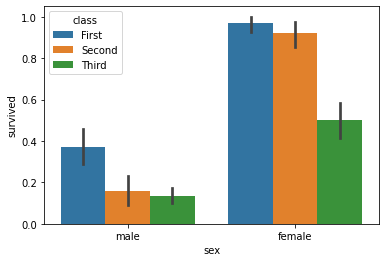

In [14]:
#直接使用PANDAS dataframe, 當作參數
#條形圖()顯示分類變數和連續變數之間的關係。數據以矩形條表示,其中條的長度表示該類別中數據的比例。
df = sns.load_dataset('titanic')
sns.barplot(x='sex', y='survived',hue='class', data=df)

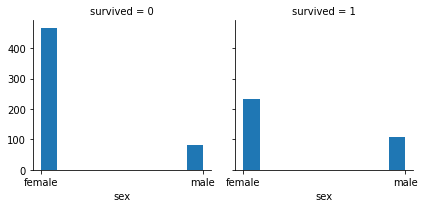

In [20]:
# 瞭解性別在各艙等的分布的存活率
g = sns.FacetGrid(df, col="survived")
g.map(plt.hist, 'sex')

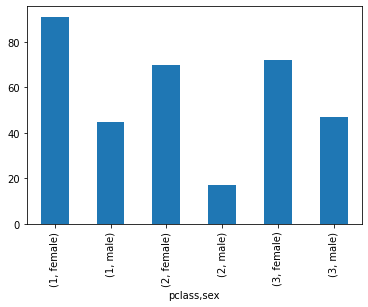

In [21]:
#先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
#其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。

df.groupby('pclass').survived.sum()

#加上性別
survived=df.groupby(['pclass','sex']).survived.sum()
survived.plot(kind='bar')

In [32]:
#使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
#繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts

<bound method DataFrame.info of survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47>

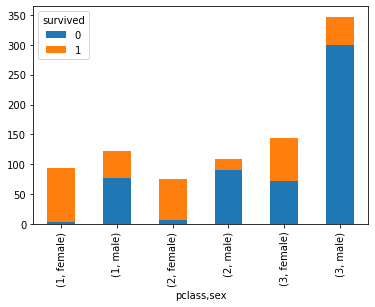

In [26]:
#使用survived_counts.plot做對照組
survived_counts.plot(kind='bar', stacked=True)

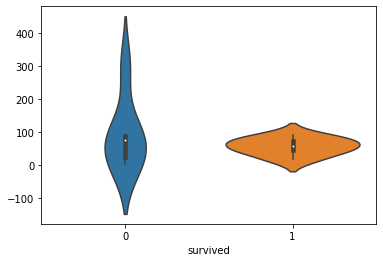

In [37]:
# 直接使用PANDAS dataframe, 當作參數
#條形圖()顯示分類變數和連續變數之間的關係。數據以矩形條表示,其中條的長度表示該類別中數據的比例。

sns.violinplot(data=survived_counts)

(<seaborn.axisgrid.FacetGrid at 0x7f70c5776350>,
 <seaborn.axisgrid.FacetGrid at 0x7f70cad493d0>)

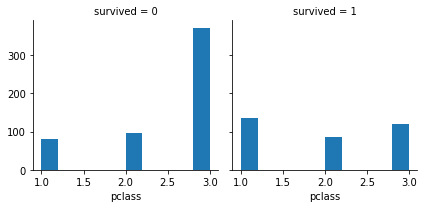

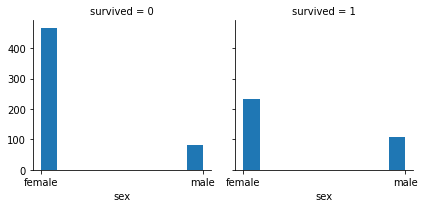

In [43]:
# 瞭解性別在各艙等的分布的存活率
g = sns.FacetGrid(df, col="survived")
g.map(plt.hist, 'pclass')
h = sns.FacetGrid(df, col="survived")
h.map(plt.hist, 'sex')
g,h